In [1]:
import pandas
import numpy
import matplotlib.pyplot

In [2]:
data = pandas.read_csv('data/Aug20.csv')
data.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


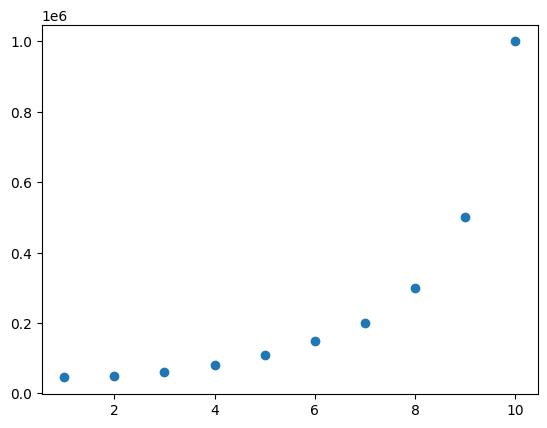

In [3]:
matplotlib.pyplot.scatter(data['Level'], data['Salary'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [7]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

print(f"X\n{X[:5, :]}")
print(f"y\n{y[:]}")

X
[[1]
 [2]
 [3]
 [4]
 [5]]
y
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [12]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_norm = scaler_x.fit_transform(X)
y_norm = scaler_y.fit_transform(y.reshape(-1,1))
X_norm[:]
y_norm[:]

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [14]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf")

svr_rbf.fit(X_norm, y_norm.reshape(-1))

svr_rbf.score(X_norm, y_norm)

0.7516001070620798

In [22]:
scaler_y.inverse_transform(svr_rbf.predict([[6.5]]).reshape(-1,1))

array([[252789.13921624]])

In [55]:
svr_rbf.predict(numpy.array([[6.5]]))

array([130000.])

## Linear regression

In [25]:
from sklearn.linear_model import Ridge

reg = Ridge()
reg.fit(X_norm, y_norm.reshape(-1))
reg.score(X_norm, y_norm)

0.6635119668029648

In [26]:
scaler_y.inverse_transform(reg.predict([[6.5]]).reshape(-1,1))

array([[1622221.00652156]])

# Comparision of SVR and Linear regrssion

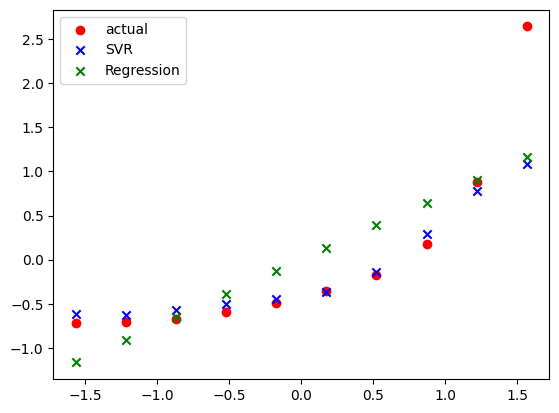

In [30]:
y_scr = svr_rbf.predict(X_norm)
y_reg = reg.predict(X_norm)

matplotlib.pyplot.scatter(X_norm, y_norm, c='r', label='actual', face)
matplotlib.pyplot.scatter(X_norm, y_scr, c='b', label = 'SVR' , marker='x')
matplotlib.pyplot.scatter(X_norm, y_reg, c='g', label = 'Regression', marker='x')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

# Iris Dataset

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
iris.keys()

In [ ]:
from IPython.display import Image
url = 'data/iris_flower.jpg'
Image(url,width=300, height=300)